# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset, get_train_input
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import numpy as np
import tensorflow as tf
import pandas as pd

%matplotlib inline

In [2]:
training_dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 87
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:

def display_images(batch):
    # color mapping of classes
    colormap = {1: [1, 0, 1], 2: [0, 1, 0], 4: [1, 1, 0]}

    f, ax = plt.subplots(5, 2, figsize=(20, 20))
    
    for i in range(len(batch)):
        img = batch[i]['image']
        classes = batch[i]['groundtruth_classes'].copy()
        bboxes = batch[i]['groundtruth_boxes'].copy()

        # resize the rectangle (bounding box) to fit the image
        resize_x, resize_y, _ = img.shape
        bboxes[:, [0, 2]] *= resize_x
        bboxes[:, [1, 3]] *= resize_y
        
        # index of the current subfigure
        x = i % 5
        y = i % 2
        
        ax[x,y].imshow(img.astype(np.uint8))    
        
        for cl, bb in zip(classes, bboxes):
            y1, x1, y2, x2 = bb
            rec = Rectangle((x1, y1), x2- x1, y2-y1, facecolor='none', edgecolor=colormap[cl])
            ax[x, y].add_patch(rec)
        ax[x ,y].axis('off')
    plt.tight_layout()
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

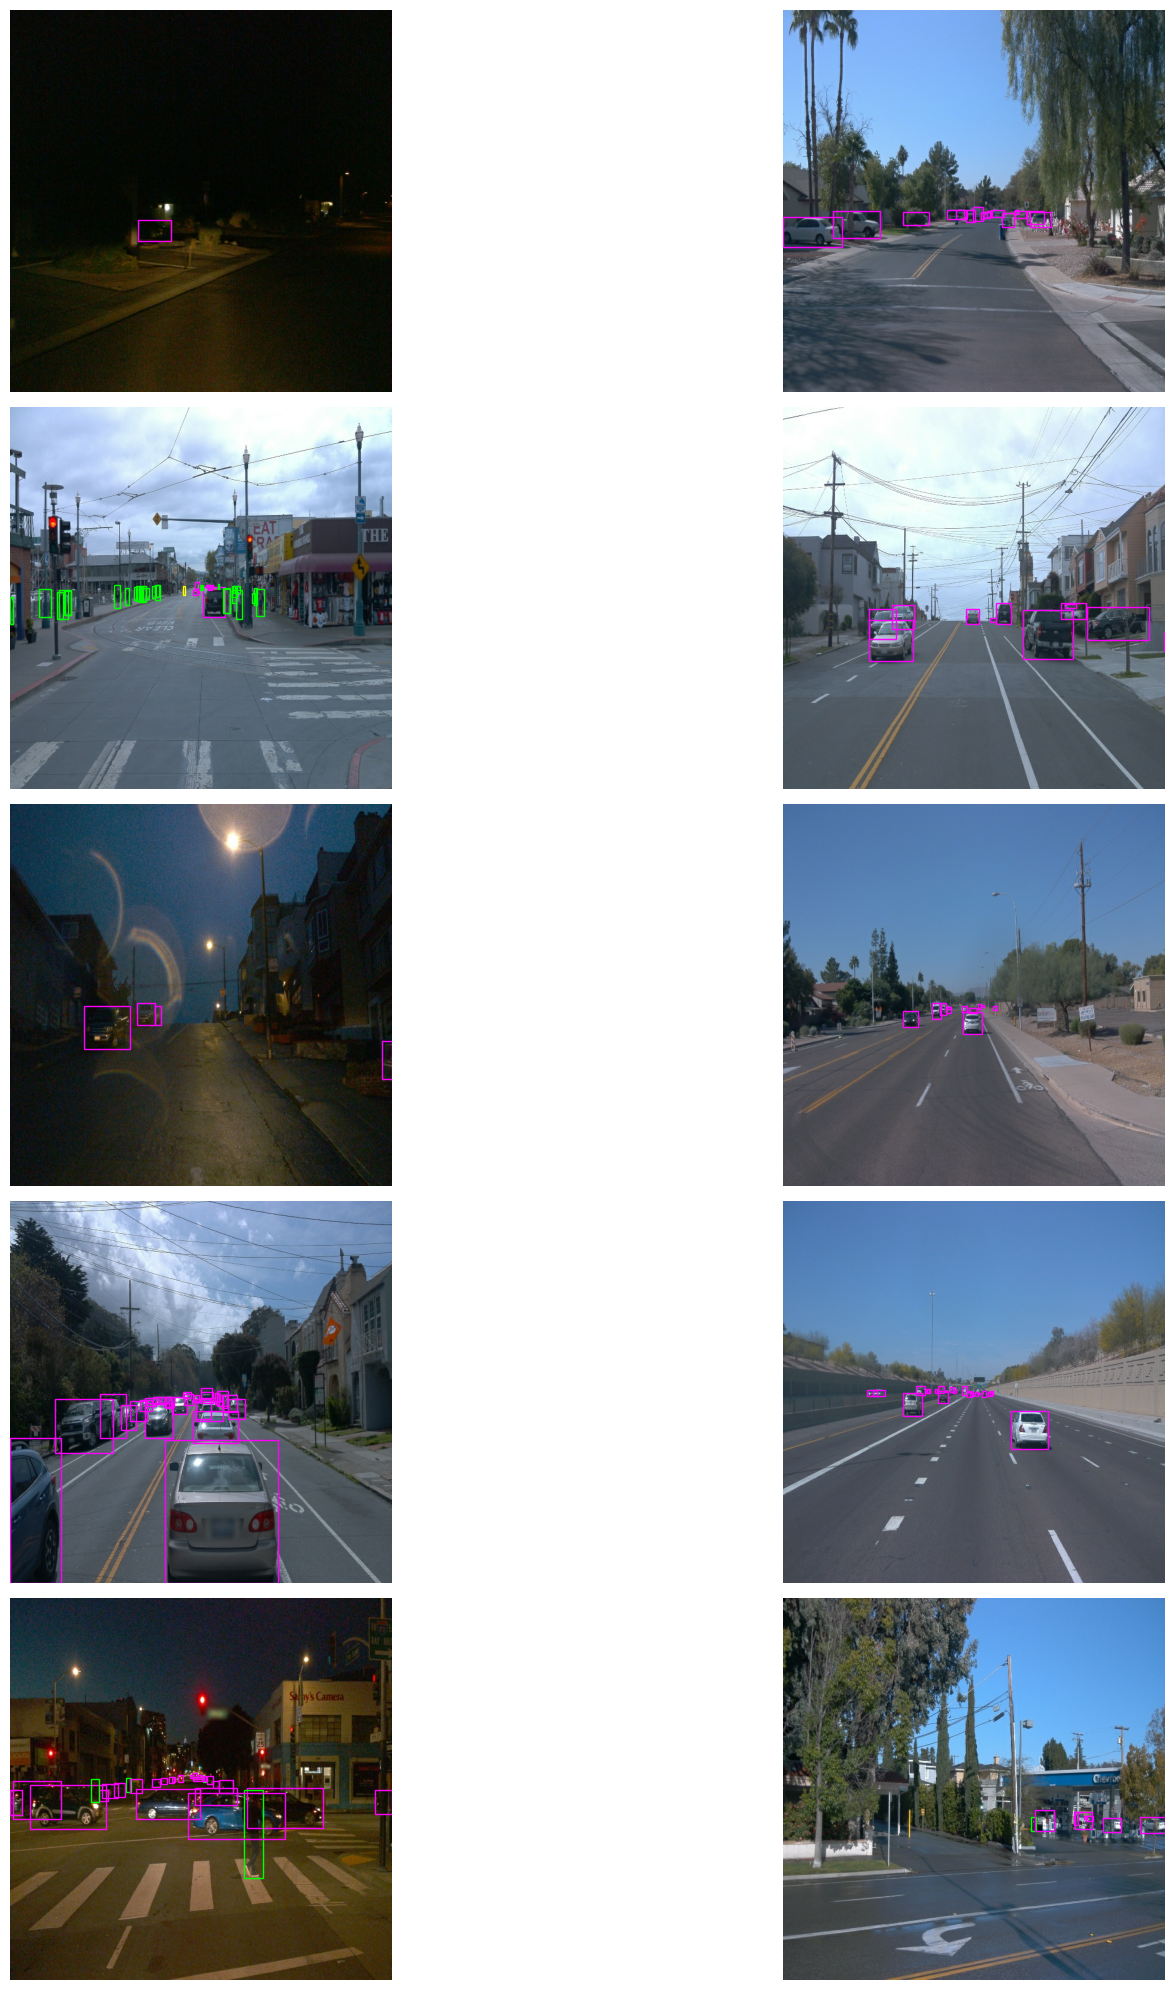

In [4]:
# Display 10 random images in dataset
Random_10_imgs = training_dataset.shuffle(600)
Random_10_imgs = Random_10_imgs.take(10)
display_images(list(Random_10_imgs.as_numpy_iterator()))

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [15]:
array_for_classes_counting = [0,0,0]

for indx, batch in enumerate(training_dataset):
    if indx > 126113:
        break
    ground_truth = batch['groundtruth_classes'].numpy()
    for sample in ground_truth:
        array_for_classes_counting[int(sample/2)] += 1
        
print('[ vehicle', 'pedestrian', 'cyclist ]',array_for_classes_counting)

[ vehicle pedestrian cyclist ] [2178827, 612315, 15667]


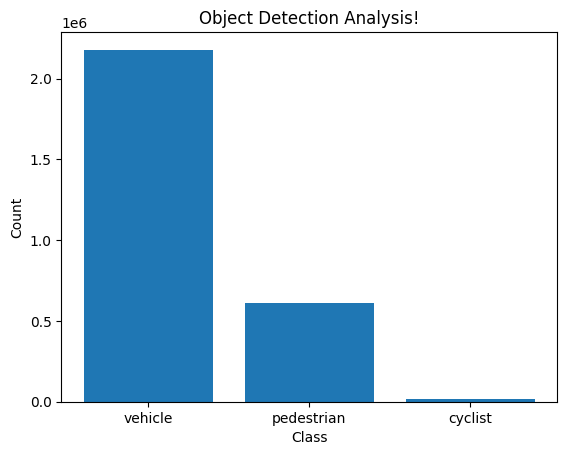

In [14]:
# plotting the points 
plt.bar(['vehicle', 'pedestrian', 'cyclist'], array_for_classes_counting)
  
# naming the x axis
plt.xlabel('Class')
# naming the y axis
plt.ylabel('Count')
  
# giving a title to my graph
plt.title('Object Detection Analysis!')
  
# function to show the plot
plt.show()